## Dataset preparation from online

In [1]:
from google_images_download import google_images_download
import os
original_path = os.getcwd()
data_path = os.path.join(original_path,'downloads')

In [2]:
response = google_images_download.googleimagesdownload()
search_queries = ['smiling dogs','sad dogs']
## add smiling person as label 0

In [3]:
# m_smiling_dog = 1000
# m_smiling_person = 600
# m_sad_dog = 600
def downloadimages(query):
    arguments = dict(keywords=query,
                    limit=1000,
                    format='jpg',
                    chromedriver='C:\\Users\\sungsooc\\Documents\\chromedriver_win32\\chromedriver.exe', 
                    #aspect_ratio='wide',
                    #size='medium',
                    silent_mode=True)
    try: 
        response.download(arguments)     
    except FileNotFoundError:  
        arguments = dict(keywords=query,
                    limit=20,
                    format='jpg',
                    print_urls=True)                       
        try:  
            response.download(arguments)  
        except: 
            pass

In [4]:
download_msg = []
for query in search_queries: 
    downloadimages(query)
    msg = 'Downloaded {} {} images!'.format(len(os.listdir(os.path.join(data_path,query))),query)
    download_msg.append(msg)
for msg in download_msg:
    print(msg)

Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 522 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 352 is all we got for this search filter!
Downloaded 522 smiling dogs images!
Downloaded 349 sad dogs images!


## File renaming

In [5]:
data_folders = os.listdir(data_path)


In [6]:
data_folders = os.listdir(data_path)
for folder in data_folders:
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    current_list = os.listdir(os.getcwd())
    for i in range(len(os.listdir(working_dir))):
        original_name = current_list[i]
        new_name = "".join(folder.split()) + '_{:04d}'.format(i+1) + os.path.splitext(original_name)[-1]
        if not os.path.exists(new_name):
            os.rename(original_name,new_name)
os.chdir(original_path)

## display

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

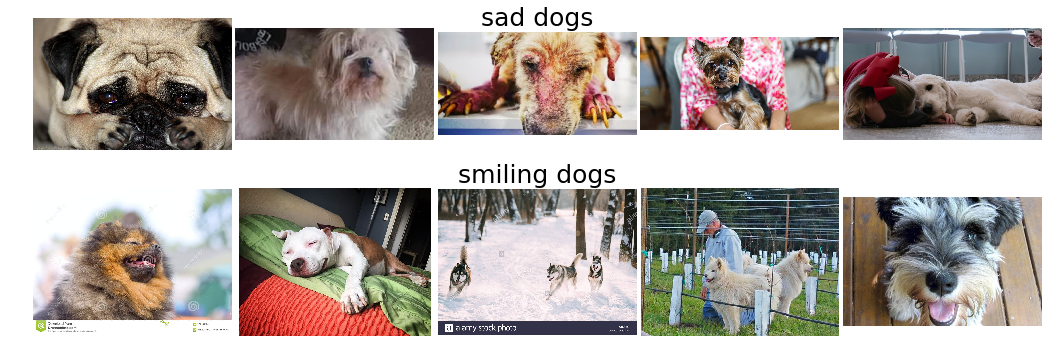

In [8]:
np.random.seed(seed=0)
n_samples = 5
fig, row = plt.subplots(2, n_samples, figsize = (4*n_samples, 3*2))

for col,folder in zip(row,data_folders):
    col[int(np.floor(n_samples/2))].set_title(folder,fontsize=25)
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    for col_ax,img in zip(col,np.random.choice(os.listdir(os.getcwd()),n_samples,replace=False)):
        rand_img = cv2.imread(img)
        rand_img = cv2.cvtColor(rand_img,cv2.COLOR_BGR2RGB)
        col_ax.imshow(rand_img)
        col_ax.axis('off')
plt.subplots_adjust(left=0.2, wspace=0.02)
os.chdir(original_path)

## Load and pre-processing

In [13]:
os.listdir(os.path.join(data_path,folder))

['smilingdogs_0001.jpg',
 'smilingdogs_0002.jpg',
 'smilingdogs_0003.jpg',
 'smilingdogs_0004.jpg',
 'smilingdogs_0005.jpg',
 'smilingdogs_0006.jpg',
 'smilingdogs_0007.jpg',
 'smilingdogs_0008.jpg',
 'smilingdogs_0009.jpg',
 'smilingdogs_0010.jpg',
 'smilingdogs_0011.jpg',
 'smilingdogs_0012.jpg',
 'smilingdogs_0013.jpg',
 'smilingdogs_0014.jpg',
 'smilingdogs_0015.jpg',
 'smilingdogs_0016.jpg',
 'smilingdogs_0017.jpg',
 'smilingdogs_0018.jpg',
 'smilingdogs_0019.jpg',
 'smilingdogs_0020.jpg',
 'smilingdogs_0021.jpg',
 'smilingdogs_0022.jpg',
 'smilingdogs_0023.jpg',
 'smilingdogs_0024.jpg',
 'smilingdogs_0025.jpg',
 'smilingdogs_0026.jpg',
 'smilingdogs_0027.jpg',
 'smilingdogs_0028.jpg',
 'smilingdogs_0029.jpg',
 'smilingdogs_0030.jpg',
 'smilingdogs_0031.jpg',
 'smilingdogs_0032.jpg',
 'smilingdogs_0033.jpg',
 'smilingdogs_0034.jpg',
 'smilingdogs_0035.jpg',
 'smilingdogs_0036.jpg',
 'smilingdogs_0037.jpg',
 'smilingdogs_0038.jpg',
 'smilingdogs_0039.jpg',
 'smilingdogs_0040.jpg',


In [22]:
img_rows = 128
img_cols = 128
img_list = []
label_list = []
labels = dict([('sad dogs',0),('smiling dogs',1)])
for folder in data_folders:
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    current_list = os.listdir(os.getcwd())
    for img in current_list:
        img_in = cv2.imread(img,0)
        #img_in = cv2.cvtColor(img_in,cv2.COLOR_BGR2GRAY)
        img_in = cv2.resize(img_in,(img_rows,img_cols))
        img_list.append(img_in)
        label_list.append(labels[folder])
os.chdir(original_path)

#### normalization

In [23]:
img_data = np.array(img_list).astype('float32')
img_label = np.array(label_list)
img_data /= 255
img_data = np.expand_dims(img_data,axis=3)

In [24]:
print(img_data.shape) #(m,row,col,channel)
print(img_label.shape)

(866, 128, 128, 1)
(866,)


## Splitting

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X_shuffled, y_shuffled = shuffle(img_data,img_label,random_state=0)

X_train,X_valid_test,y_train,y_valid_test = train_test_split(X_shuffled,y_shuffled,test_size=0.1,random_state=0,stratify=y_shuffled)
X_valid,X_test,y_valid,y_test = train_test_split(X_valid_test,y_valid_test,test_size=0.5,random_state=0,stratify=y_valid_test)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_valid shape: {}'.format(X_valid.shape))
print('y_valid shape: {}'.format(y_valid.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (779, 128, 128, 1)
y_train shape: (779,)
X_valid shape: (43, 128, 128, 1)
y_valid shape: (43,)
X_test shape: (44, 128, 128, 1)
y_test shape: (44,)


## Model building

In [48]:
from keras.models import Sequential
from keras.layers import Dense,Activation,BatchNormalization,Flatten,Conv2D,MaxPooling2D,ZeroPadding2D,GlobalAveragePooling2D,Dropout
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras.optimizers import Adam,RMSprop
#from keras.preprocessing.image import ImageDataGenerator
#from keras.applications.vgg16 import VGG16
#from keras import backend as K
#from keras.models import load_model

In [49]:
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8, amsgrad=False)
epochs = 100
batch_size = 8

In [50]:
X_input_shape = img_data[0].shape

model = Sequential([
    Conv2D(32,(3,3),padding='same',input_shape=X_input_shape),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Conv2D(64,(3,3),padding='same',input_shape=X_input_shape),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.5),
    
    Flatten(),
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(1),
    Activation('sigmoid')
])
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
activation_13 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
activation_14 (Activation)   (None, 64, 64, 64)        0         
__________

In [52]:
hist = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1,validation_data=(X_valid,y_valid))#,callbacks=[save_best_model_1,learning_rate_reduction])

Train on 779 samples, validate on 43 samples
Epoch 1/100
779/779 [==============================] - 3s 4ms/step - loss: 0.7760 - acc: 0.5854 - val_loss: 0.8185 - val_acc: 0.5581
Epoch 2/100
779/779 [==============================] - 2s 2ms/step - loss: 0.6982 - acc: 0.6303 - val_loss: 0.9507 - val_acc: 0.4186
Epoch 3/100
779/779 [==============================] - 2s 2ms/step - loss: 0.6140 - acc: 0.6778 - val_loss: 0.6306 - val_acc: 0.6047
Epoch 4/100
779/779 [==============================] - 2s 2ms/step - loss: 0.5258 - acc: 0.7510 - val_loss: 0.7349 - val_acc: 0.5814
Epoch 5/100
779/779 [==============================] - 2s 2ms/step - loss: 0.4870 - acc: 0.7664 - val_loss: 0.7145 - val_acc: 0.6279
Epoch 6/100
779/779 [==============================] - 2s 2ms/step - loss: 0.4435 - acc: 0.7959 - val_loss: 0.5688 - val_acc: 0.6047
Epoch 7/100
779/779 [==============================] - 2s 2ms/step - loss: 0.3986 - acc: 0.8241 - val_loss: 0.6467 - val_acc: 0.6977
Epoch 8/100
779/779 [===

Epoch 62/100
779/779 [==============================] - 2s 2ms/step - loss: 0.1011 - acc: 0.9679 - val_loss: 0.7144 - val_acc: 0.6977
Epoch 63/100
779/779 [==============================] - 2s 2ms/step - loss: 0.1248 - acc: 0.9512 - val_loss: 1.1337 - val_acc: 0.5581
Epoch 64/100
779/779 [==============================] - 2s 2ms/step - loss: 0.0962 - acc: 0.9679 - val_loss: 1.0580 - val_acc: 0.5814
Epoch 65/100
779/779 [==============================] - 2s 2ms/step - loss: 0.0878 - acc: 0.9705 - val_loss: 1.2001 - val_acc: 0.6047
Epoch 66/100
779/779 [==============================] - 2s 2ms/step - loss: 0.1650 - acc: 0.9499 - val_loss: 1.0498 - val_acc: 0.6047
Epoch 67/100
779/779 [==============================] - 2s 2ms/step - loss: 0.1069 - acc: 0.9615 - val_loss: 1.2460 - val_acc: 0.5349
Epoch 68/100
779/779 [==============================] - 2s 2ms/step - loss: 0.1209 - acc: 0.9538 - val_loss: 0.9620 - val_acc: 0.6512
Epoch 69/100
779/779 [==============================] - 2s 2ms

In [53]:
valid_loss, valid_accuracy = model.evaluate(X_valid, y_valid, verbose=1)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Dev: accuracy = %f  ;  loss = %f" % (valid_accuracy, valid_loss))
print("Test: accuracy = %f  ;  loss = %f" % (test_accuracy, test_loss))

44/44 [==============================] - 0s 861us/step
Dev: accuracy = 0.651163  ;  loss = 0.953666
Test: accuracy = 0.500000  ;  loss = 1.481496


In [54]:
%load_ext autoreload
%autoreload 2
import plot_learning as pl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


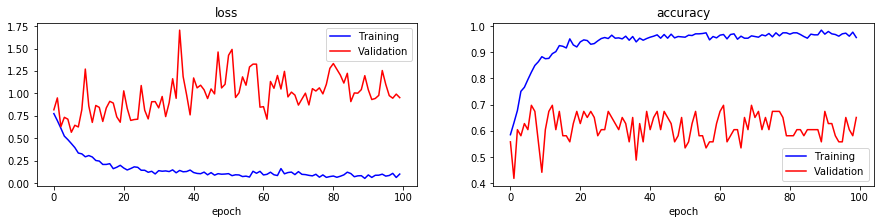

In [55]:
pl.training_plot(hist)

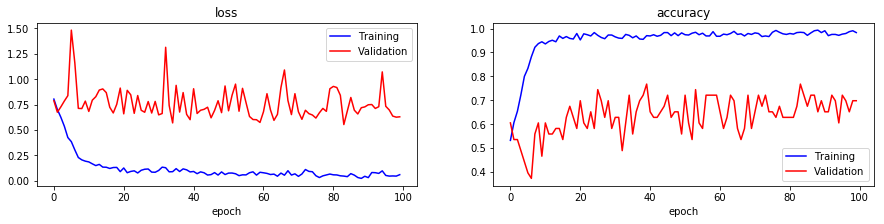

In [47]:
pl.training_plot(hist)#added batchnorm and dropout

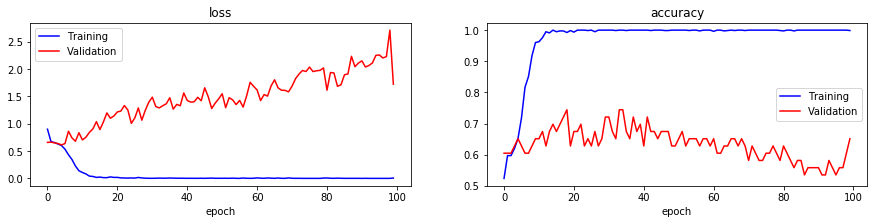

In [33]:
pl.training_plot(hist)#original

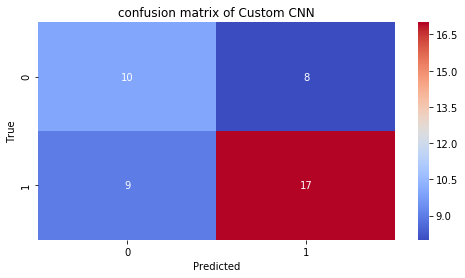

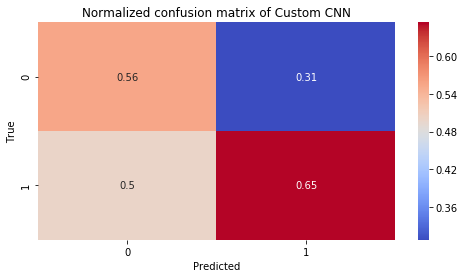

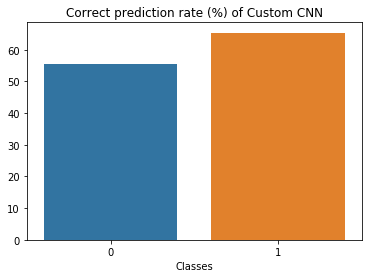

In [34]:
y_pred = model.predict_classes(X_test)
y_true = y_test
pl.confusion_matrix_plot(y_true,y_pred,'Custom CNN')

In [ ]:
# test_img = cv2.imread('',0)
# test_img = cv2.resize
# =np.array
# =astype
# /255
# check shape
# predict
# predict_classes

In [ ]:

# test_image = cv2.imread('HAM10000_images_part_2/'+new_test_image_id+'.jpg')
# test_image = cv2.resize(test_image,(img_cols,img_rows))
# test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
# test_image_original = test_image.copy()
# test_image_flat = test_image.flatten()
# test_image_flat = scale(test_image_flat)
# test_image =test_image_flat.reshape(1,img_rows,img_cols,img_channels)

# plt.imshow(test_image_original)
# plt.axis('off')
# plt.title('example test image - cell_type_idx: '+str(true_cell_type_idx))
# plt.show()

# test_image_pred = model_2.predict(test_image)
# test_image_pred_classes = np.argmax(test_image_pred,axis=1)
# print('true cell_type_idx: {}'.format(true_cell_type_idx))
# print('predicted cell_type_idx: {}'.format(test_image_pred_classes[0]))

## make the notebook using image generator